## Линейная регрессия

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

### Мы будем работать с Бостонским датасетом:

https://www.kaggle.com/c/boston-dataset/data

In [2]:
data = pd.read_csv('boston_train_data.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [3]:
data.shape

(404, 14)

In [4]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


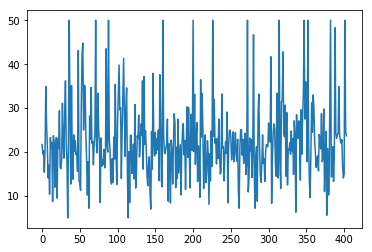

In [5]:
data.medv.plot()

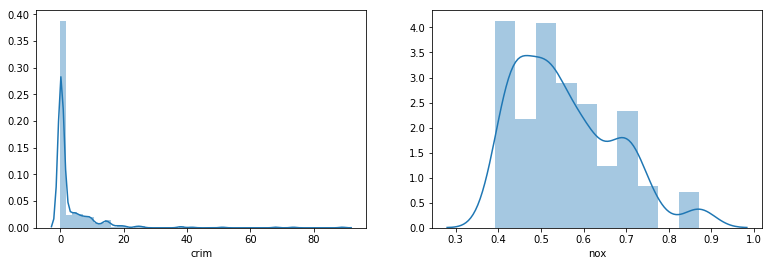

In [6]:
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
sns.distplot(data['crim'])
plt.subplot(1, 2, 2)
sns.distplot(data['nox']);

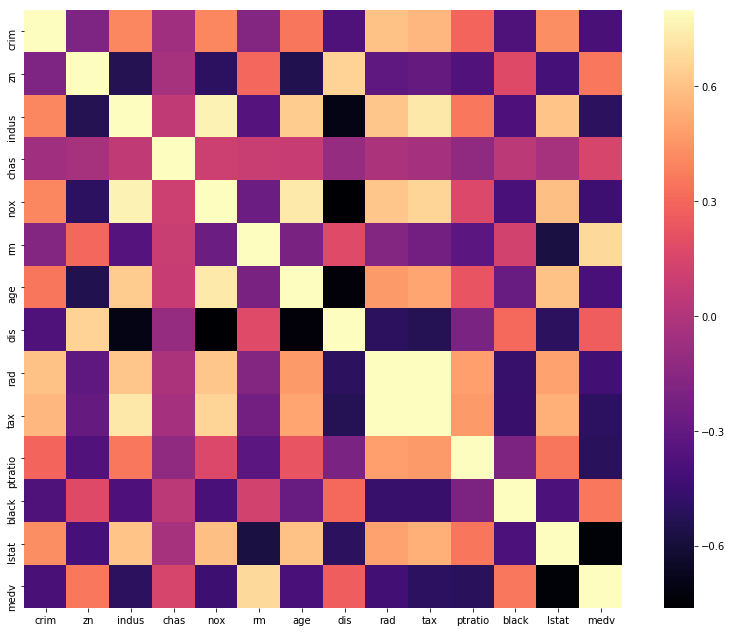

In [7]:
corr = data.corr()
plt.figure(figsize=(15, 11))
sns.heatmap(corr, vmax=.8, square=True, cmap='magma');

Сперва удалим целевую переменную из данных (не забыв сохранить ее в отдельной переменной):

In [8]:
y = data.medv
data.drop(columns=['medv'], inplace=True)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43


In [9]:
y[:5]

0    21.7
1    19.6
2    20.3
3    15.4
4    20.5
Name: medv, dtype: float64

Разделим нашу выборку на обучение и тест:

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.3, random_state=1)

In [11]:
X_train.shape

(282, 13)

Обучим простую линейную регрессию с параметрами по умолчанию:

In [12]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
#обучаем регрессию
reg.fit(X_train, Y_train)
#смотрим на качество
pred = reg.predict(X_test)
pred[:5]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


array([31.23382361,  8.00228144, 12.92946675, 11.17336937, 19.55855989])

Как оценить качество нашей модели?

Попробуем вычислить MSE: напишите функцию, которая получает на вход два веткора (с истинными ответами и с предсказанными), и возвращает MSE.

In [13]:
def MSE(y_true, preds):
    # место для Вашего кода

In [14]:
MSE(Y_test, pred)

Разумеется, все метрики уже реализованы в sklearn:

In [15]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

In [16]:
MSE(Y_test, pred)

22.049835283394625

In [17]:
MAE(Y_test, pred)

3.1089304218997897

Хорошее ли это качество? Посмотрим на распределение цен:

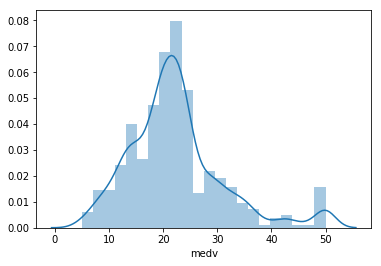

In [19]:
sns.distplot(y);

Коэффициенты в полученной модели:

In [20]:
pd.DataFrame({'feature':data.columns, 'importance': reg.coef_})

,feature,importance
0,crim,-0.106127
1,zn,0.038094
2,indus,0.019623
3,chas,1.682880
4,nox,-9.866563
5,rm,4.457378
6,age,-0.015691
7,dis,-1.191660
8,rad,0.240355
9,tax,-0.012482


Попробуем добавить регуляризацию: L2-регуляризация реализована в методе Ridge.

In [21]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=0.05)
reg.fit(X_train, Y_train)
pred = reg.predict(X_test)

In [22]:
MSE(Y_test, pred)

22.110099742738853

In [23]:
MAE(Y_test, pred)

3.110665775352335

L1-регуляризация реализована в методе Lasso.

In [24]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=0.05)
reg.fit(X_train, Y_train)
pred = reg.predict(X_test)

In [25]:
MSE(Y_test, pred)

23.43603487453016

In [26]:
MAE(Y_test, pred)

3.181375867301808

Качество стало лучше: подберем оптимальный гиперпараметр alpha.

In [27]:
params = np.linspace(-1, 1, 20)

results = []
for a in params:
    reg = Lasso(alpha=a)
    reg.fit(X_train, Y_train)
    pred = reg.predict(X_test)
    results.append(MSE(pred, Y_test))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


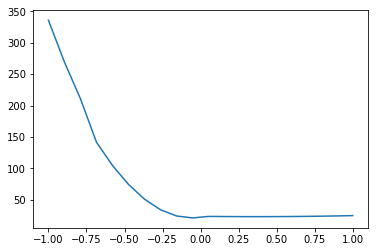

In [28]:
plt.plot(params, results);

Посмотрим, как исходные признаки коррелируют с целевой переменной:

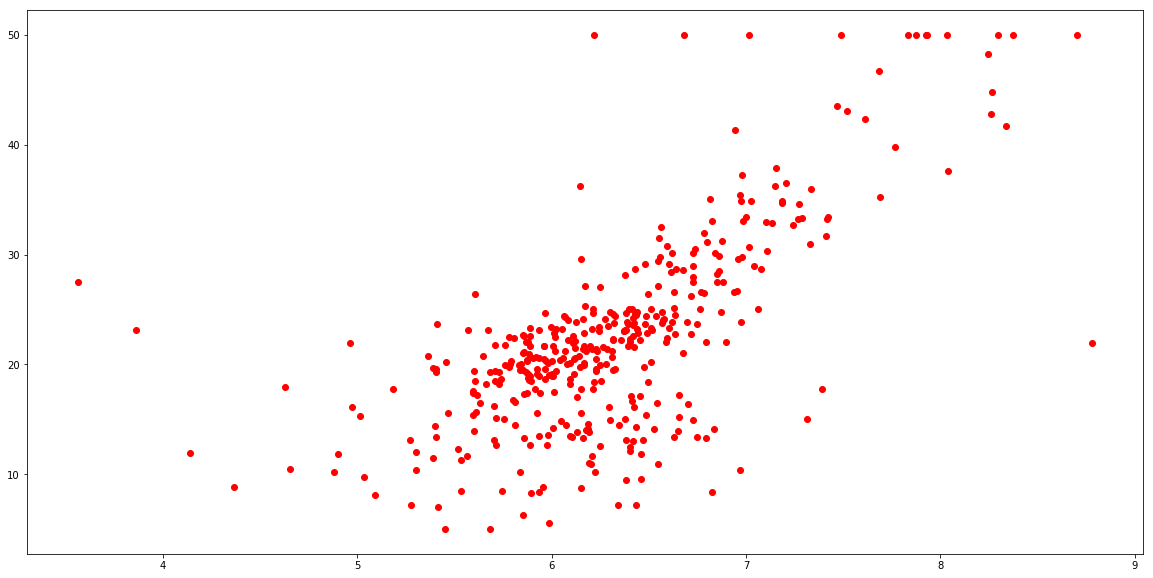

In [29]:
plt.figure(figsize=(20, 10))
plt.plot(data['rm'], y, 'o', c='red')
plt.show()

Видно, что зависимость не совсем линейная: попробуем подобрать преобразование признака, которое приблизит зависимость к линейной.

In [30]:
coefs = scipy.polyfit(data.rm, y, deg = 2)
coefs

array([  2.39333538, -21.75638127,  63.28346633])

In [31]:
poly = scipy.poly1d(coefs)
poly(1)

43.920420442490595

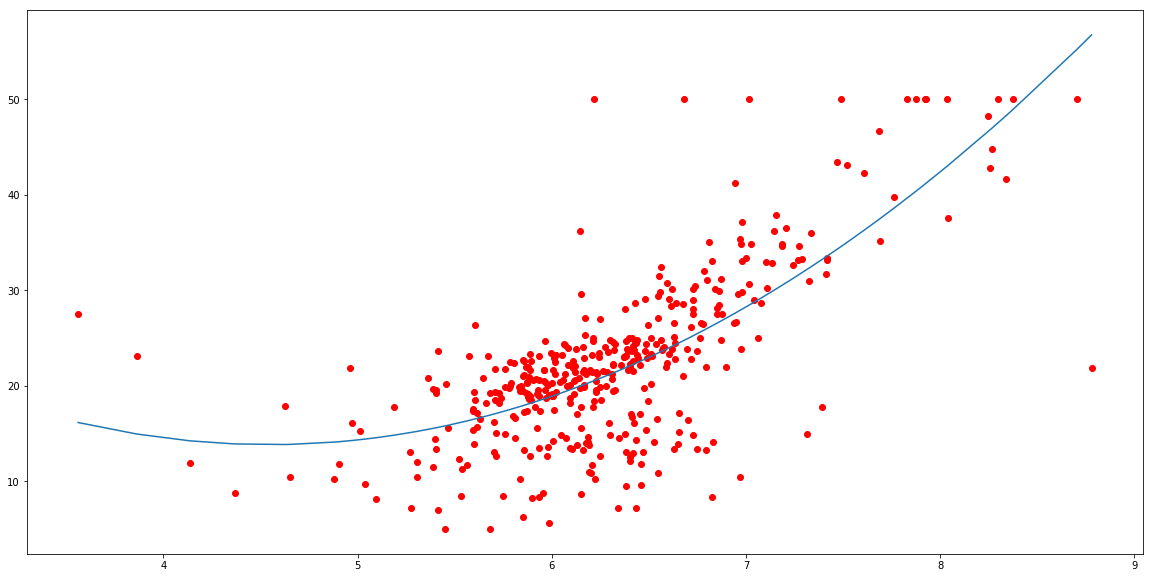

In [32]:
plt.figure(figsize=(20, 10))
plt.scatter(data.rm, y, c='red')
plt.plot(sorted(data.rm), poly(sorted(data.rm)))

Заменим исходный признак rm на преобразованный:

In [33]:
data['rm'] = poly(np.array(data.rm))

Обучим регрессию заново и проверим качество:

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.3, random_state=1)

reg = LinearRegression()
reg.fit(X_train, Y_train)
pred = reg.predict(X_test)
MSE(Y_test, pred)

16.957692193809443

## Домашнее задание:

1. **(2 балла)** Проверьте оставшиеся признаки (можно только топ-3 по feature importance) на предмет нелинейной зависимости от целевой переменной. Подберите преобразования, приближающие зависимость к линейной, и сравните качество моделей на полученных признаках.
2. **(2 балла)** Попробуйте добавить к исходным признакам их комбинации, например, сумму/произведение/частное двух признаков или их квадраты. Для каждого нового признака проверьте корреляцию с целевой переменной.
3. **(1 балл)** Зафиксируйте модель, полученную в пункте 2: найдите веса полученной модели и попробуйте убрать наименее значимые признаки. Стало ли качество модели лучше?
4. **(4 балла)** Выберите модель, которая показала наилучшее качество, и с ее помощью получите прогноз для тестовых данных с Kaggle: https://www.kaggle.com/c/boston-dataset/data (файл **boston_test_data.csv**). Не забудьте применить все преобразования, которые вы сделали с признаками, к тестовым данным!
5. **(1 балл)** Сохраните полученный прогноз в формате, указанном на Kaggle (код с примером, как это можно сделать, ниже) и отправьте на Kaggle. Вы увидите свой результат в лидерборде: https://www.kaggle.com/c/boston-dataset/leaderboard (обратите внимание, что используемая в соревновании метрика - MAE).

**Jupyter Notebook с кодом решения нужно прислать на адрес impecopeco@gmail.com.** Пожалуйста, укажите тему письма в соответствии с данным шаблоном: 

**МАДМО ДЗ 1 %Имя фамилия%**

например: "МАДМО ДЗ 1 Саркисян Вероника".
Весь код должен быть воспроизводимым.

In [35]:
pred[:5] # Ваш массив с предсказаниями

array([30.64935072,  8.1768343 , 12.72225835, 11.97525057, 19.09253673])

In [36]:
s = pd.DataFrame({'id':np.arange(len(pred)), 'price':pred})
s.head()

,id,price
0,0,30.649351
1,1,8.176834
2,2,12.722258
3,3,11.975251
4,4,19.092537


In [37]:
s.to_csv('submission.csv', index=False)